In [3]:
### Some initializations
import numpy as np
import math
import random
import copy
import matplotlib.pyplot as plt
import scipy
import scipy.stats
import lingam
import pickle
import warnings
from scipy.stats import binomtest
import itertools
import loli
from heapq import nlargest
from matplotlib.patches import Patch
from sklearn.cluster import KMeans

In [4]:
def yerr(tot,res):
    yerrbar=np.zeros((2,len(res)))
    for i in range(len(res)):

        if res[i]>1:
            res[i]=1
        if res[i]<0:
            res[i]=0
        result = binomtest(k=int(res[i]*tot), n=tot, p=res[i])
        yerrbar[0,i]=res[i]-result.proportion_ci()[0]
        yerrbar[1,i]=result.proportion_ci()[1]-res[i]
    return yerrbar

C:\ProgramData\Anaconda3\envs\causal\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
C:\ProgramData\Anaconda3\envs\causal\lib\site-packages\ipykernel_launcher.py:27: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
C:\ProgramData\Anaconda3\envs\causal\lib\site-packages\ipykernel_launcher.py:28: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
C:\ProgramData\Anaconda3\envs\causal\lib\site-packages\ipykernel_launcher.py:29: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.


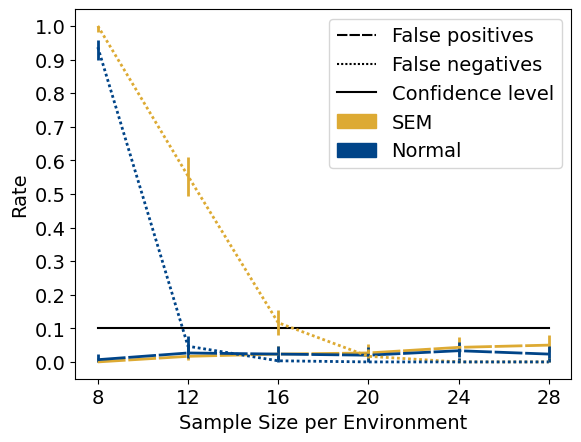

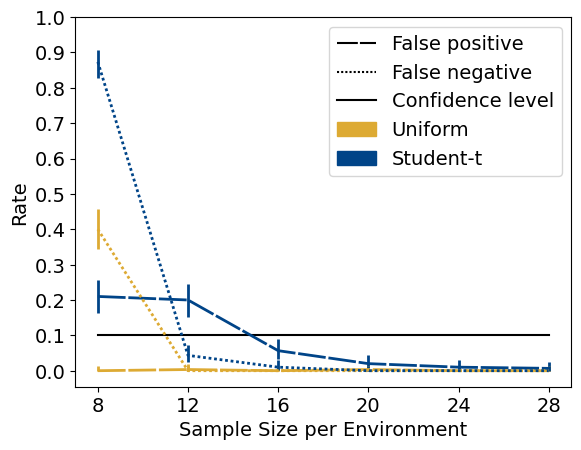

In [45]:
## Creating Figure 3

with open('SamplechangeE30.pkl','rb') as f:
    SamplechangeE30=pickle.load(f)

# runs=300

fpt=SamplechangeE30['fpt']
fnt=SamplechangeE30['fnt']
fptrunc=SamplechangeE30['fptrunc']
fntrunc=SamplechangeE30['fntrunc']
fp=SamplechangeE30['fp']
fn=SamplechangeE30['fn']
fpind=SamplechangeE30['fpind']
fnind=SamplechangeE30['fnind']
sample=SamplechangeE30['sample']
    
fig, ax = plt.subplots()
plt.xticks(sample)
plt.yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)

false_pos = plt.Line2D([], [], color='black', linestyle=(0, (10, 1)),marker="s",label='False positive')
false_neg = plt.Line2D([], [], color='black', linestyle=(0, (1, 1)),label='False negative')
sem = Patch([], [], color='#DDAA33',label='SEM')
normal = Patch([], [], color='#004488',label='Normal')
trunc = Patch([], [], color='#DDAA33',label='Uniform')
student = Patch([], [], color='#004488',label='Student-t')
conf= plt.Line2D([], [], color='black',label='Confidence level')

plt.plot(sample,0.1*np.ones((len(sample))),label='Confidence level',color='black')
plt.errorbar(sample,fp,yerr=yerr(runs,fp),c='#DDAA33',label='False Positive SEM',linestyle=(0, (10, 1)),linewidth=2)
plt.errorbar(sample,fpind,yerr=yerr(runs,fpind),c='#004488',label='False Positive Normal',linestyle=(0, (10, 1)),linewidth=2)
plt.errorbar(sample,fn,yerr=yerr(runs,fn),c='#DDAA33',label='False Negative SEM',linestyle=(0, (1, 1)),linewidth=2)
plt.errorbar(sample,fnind,yerr=yerr(runs,fnind),c='#004488',label='False Negative Normal',linestyle=(0, (1, 1)),linewidth=2)
false_pos = plt.Line2D([], [], color='black', linestyle=(0, (5, 1)),label='False positives')
false_neg = plt.Line2D([], [], color='black', linestyle=(0, (1, 1)),label='False negatives')
ax.legend(handles=[false_pos,false_neg,conf,sem,normal],fontsize=14)
plt.xlabel('Sample Size per Environment',fontsize=14)
plt.ylabel('Rate',fontsize=14)
plt.savefig('SamplechangSem.pdf',bbox_inches="tight",format='pdf')
plt.show()



fig, ax = plt.subplots()
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)
plt.errorbar(sample,0.1*np.ones((len(sample))),label='Confidence level',color='black')
plt.errorbar(sample,fptrunc,yerr=yerr(runs,fptrunc),c='#DDAA33',label='False Positive Truncated',linestyle=(0, (10, 1)),linewidth=2)
plt.errorbar(sample,fpt,yerr=yerr(runs,fpt),c='#004488',label='False Positive Student-t',linestyle=(0, (10, 1)),linewidth=2)
plt.errorbar(sample,fntrunc,yerr=yerr(runs,fntrunc),c='#DDAA33',label='False Negative Truncated',linestyle=(0, (1, 1)),linewidth=2)
plt.errorbar(sample,fnt,yerr=yerr(runs,fnt),c='#004488',label='False Negative Student-t',linestyle=(0, (1, 1)),linewidth=2)
false_pos = plt.Line2D([], [], color='black', linestyle=(0, (10, 1)),label='False positive')
false_neg = plt.Line2D([], [], color='black', linestyle=(0, (1, 1)),label='False negative')
ax.legend(handles=[false_pos,false_neg,conf,trunc,student],fontsize=14)
plt.xlabel('Sample Size per Environment',fontsize=14)
plt.xticks(sample)
plt.yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
plt.ylabel('Rate',fontsize=14)
plt.savefig('SamplechangNonNormal.pdf',bbox_inches="tight",format='pdf')
plt.show()

C:\ProgramData\Anaconda3\envs\causal\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
C:\ProgramData\Anaconda3\envs\causal\lib\site-packages\ipykernel_launcher.py:24: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
C:\ProgramData\Anaconda3\envs\causal\lib\site-packages\ipykernel_launcher.py:25: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
C:\ProgramData\Anaconda3\envs\causal\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.


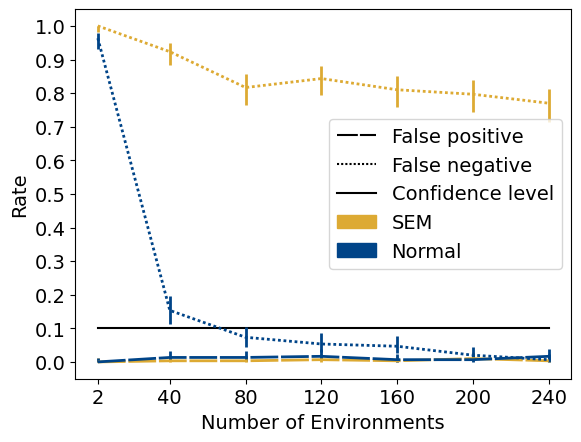

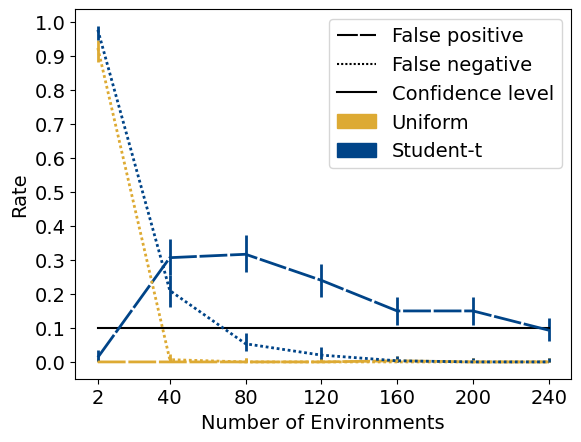

In [46]:
## Creating Figure 4 a

with open('EnvironmentchangN10.pkl','rb') as f:
    EnvironmentchangN10=pickle.load(f)

    
fpt=EnvironmentchangN10['fpt']
fnt=EnvironmentchangN10['fnt']
fptrunc=EnvironmentchangN10['fptrunc']
fntrunc=EnvironmentchangN10['fntrunc']
fp=EnvironmentchangN10['fp']
fn=EnvironmentchangN10['fn']
fpind=EnvironmentchangN10['fpind']
fnind=EnvironmentchangN10['fnind']
environments=EnvironmentchangN10['environments']   

fig, ax = plt.subplots()
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)

false_pos = plt.Line2D([], [], color='black', linestyle=(0, (10, 1)),label='False positives')
false_neg = plt.Line2D([], [], color='black', linestyle=(0, (1, 1)),label='False negatives')
sem = Patch([], [], color='#DDAA33',label='SEM')
normal = Patch([], [], color='#004488',label='Normal')
trunc = Patch([], [], color='#DDAA33',label='Uniform')
student = Patch([], [], color='#004488',label='Student-t')
conf= plt.Line2D([], [], color='black',label='Confidence level')

plt.plot(environments,0.1*np.ones((len(environments))),label='Confidence level',color='black')
plt.errorbar(environments,fp,yerr=yerr(runs,fp),c='#DDAA33',label='False Positive SEM',linestyle=(0, (10, 1)),linewidth=2)
plt.errorbar(environments,fpind,yerr=yerr(runs,fpind),c='#004488',label='False Positive Normal',linestyle=(0, (10, 1)),linewidth=2)
plt.errorbar(environments,fn,yerr=yerr(runs,fn),c='#DDAA33',label='False Negative SEM',linestyle=(0, (1, 1)),linewidth=2)
plt.errorbar(environments,fnind,yerr=yerr(runs,fnind),c='#004488',label='False Negative Normal',linestyle=(0, (1, 1)),linewidth=2)
false_pos = plt.Line2D([], [], color='black', linestyle=(0, (10, 1)),label='False positive')
false_neg = plt.Line2D([], [], color='black', linestyle=(0, (1, 1)),label='False negative')
ax.legend(handles=[false_pos,false_neg,conf,sem,normal],fontsize=14)
plt.xticks(environments)
plt.yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
plt.xlabel('Number of Environments',fontsize=14)
plt.ylabel('Rate',fontsize=14)
plt.savefig('EnvironmentchangSemN.pdf',bbox_inches="tight",format='pdf')
plt.show()


fig, ax = plt.subplots()
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)
plt.errorbar(environments,0.1*np.ones((len(environments))),label='Confidence level',color='black')
plt.errorbar(environments,fptrunc,yerr=yerr(runs,fptrunc),c='#DDAA33',label='False Positive Uniform',linestyle=(0, (10, 1)),linewidth=2)
plt.errorbar(environments,fpt,yerr=yerr(runs,fpt),c='#004488',label='False Positive Student-t',linestyle=(0, (10, 1)),linewidth=2)
plt.errorbar(environments,fntrunc,yerr=yerr(runs,fntrunc),c='#DDAA33',label='False Negative Uniform',linestyle=(0, (1, 1)),linewidth=2)
plt.errorbar(environments,fnt,yerr=yerr(runs,fnt),c='#004488',label='False Negative Student-t',linestyle=(0, (1, 1)),linewidth=2)
false_pos = plt.Line2D([], [], color='black', linestyle=(0, (10, 1)),label='False positive')
false_neg = plt.Line2D([], [], color='black', linestyle=(0, (1, 1)),label='False negative')
ax.legend(handles=[false_pos,false_neg,conf,trunc,student],fontsize=14)
plt.xticks(environments)
plt.yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
plt.xlabel('Number of Environments',fontsize=14)
plt.ylabel('Rate',fontsize=14)
plt.savefig('EnvironmentchangNonNormalN.pdf',bbox_inches="tight",format='pdf')
plt.show()


C:\ProgramData\Anaconda3\envs\causal\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
C:\ProgramData\Anaconda3\envs\causal\lib\site-packages\ipykernel_launcher.py:24: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
C:\ProgramData\Anaconda3\envs\causal\lib\site-packages\ipykernel_launcher.py:25: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
C:\ProgramData\Anaconda3\envs\causal\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.


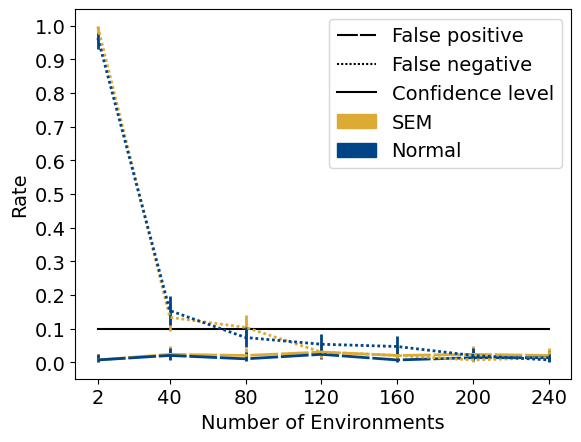

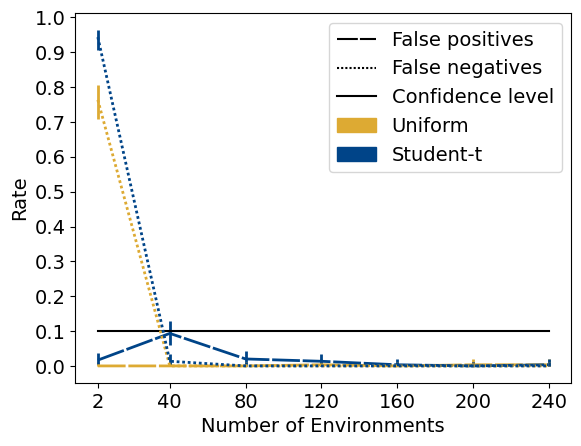

In [47]:
## Creating Figure 4 b

with open('EnvironmentchangN14.pkl','rb') as f:
    EnvironmentchangN14=pickle.load(f)

    
fpt=EnvironmentchangN14['fpt']
fnt=EnvironmentchangN14['fnt']
fptrunc=EnvironmentchangN14['fptrunc']
fntrunc=EnvironmentchangN14['fntrunc']
fp=EnvironmentchangN14['fp']
fn=EnvironmentchangN14['fn']
fpind=EnvironmentchangN14['fpind']
fnind=EnvironmentchangN10['fnind']
environments=EnvironmentchangN10['environments']   

fig, ax = plt.subplots()
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)

false_pos = plt.Line2D([], [], color='black', linestyle=(0, (10, 1)),label='False positive')
false_neg = plt.Line2D([], [], color='black', linestyle=(0, (1, 1)),label='False negative')
sem = Patch([], [], color='#DDAA33',label='SEM')
normal = Patch([], [], color='#004488',label='Normal')
trunc = Patch([], [], color='#DDAA33',label='Uniform')
student = Patch([], [], color='#004488',label='Student-t')
conf= plt.Line2D([], [], color='black',label='Confidence level')

plt.plot(environments,0.1*np.ones((len(environments))),label='Confidence level',color='black')
plt.errorbar(environments,fp,yerr=yerr(runs,fp),c='#DDAA33',label='False Positive SEM',linestyle=(0, (10, 1)),linewidth=2)
plt.errorbar(environments,fpind,yerr=yerr(runs,fpind),c='#004488',label='False Positive Normal',linestyle=(0, (10, 1)),linewidth=2)
plt.errorbar(environments,fn,yerr=yerr(runs,fn),c='#DDAA33',label='False Negative SEM',linestyle=(0, (1, 1)),linewidth=2)
plt.errorbar(environments,fnind,yerr=yerr(runs,fnind),c='#004488',label='False Negative Normal',linestyle=(0, (1, 1)),linewidth=2)
false_pos = plt.Line2D([], [], color='black', linestyle=(0, (10, 1)),label='False positive')
false_neg = plt.Line2D([], [], color='black', linestyle=(0, (1, 1)),label='False negative')
ax.legend(handles=[false_pos,false_neg,conf,sem,normal],fontsize=14)
plt.xticks(environments)
plt.yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
plt.xlabel('Number of Environments',fontsize=14)
plt.ylabel('Rate',fontsize=14)
plt.savefig('EnvironmentchangSem.pdf',bbox_inches="tight",format='pdf')
plt.show()


fig, ax = plt.subplots()
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)
plt.errorbar(environments,0.1*np.ones((len(environments))),label='Confidence level',color='black')
plt.errorbar(environments,fptrunc,yerr=yerr(runs,fptrunc),c='#DDAA33',label='False Positive Uniform',linestyle=(0, (10, 1)),linewidth=2)
plt.errorbar(environments,fpt,yerr=yerr(runs,fpt),c='#004488',label='False Positive Student-t',linestyle=(0, (10, 1)),linewidth=2)
plt.errorbar(environments,fntrunc,yerr=yerr(runs,fntrunc),c='#DDAA33',label='False Negative Uniform',linestyle=(0, (1, 1)),linewidth=2)
plt.errorbar(environments,fnt,yerr=yerr(runs,fnt),c='#004488',label='False Negative Student-t',linestyle=(0, (1, 1)),linewidth=2)
false_pos = plt.Line2D([], [], color='black', linestyle=(0, (10, 1)),label='False positives')
false_neg = plt.Line2D([], [], color='black', linestyle=(0, (1, 1)),label='False negatives')
ax.legend(handles=[false_pos,false_neg,conf,trunc,student],fontsize=14)
plt.xticks(environments)
plt.yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
plt.xlabel('Number of Environments',fontsize=14)
plt.ylabel('Rate',fontsize=14)
plt.savefig('EnvironmentchangNonNormal.pdf',bbox_inches="tight",format='pdf')
plt.show()


C:\ProgramData\Anaconda3\envs\causal\lib\site-packages\ipykernel_launcher.py:25: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
C:\ProgramData\Anaconda3\envs\causal\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.


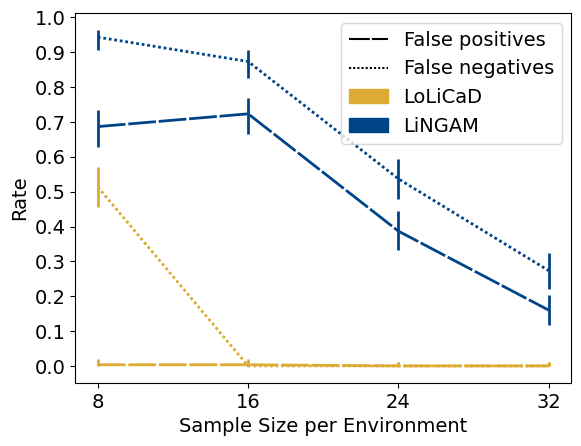

C:\ProgramData\Anaconda3\envs\causal\lib\site-packages\ipykernel_launcher.py:51: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
C:\ProgramData\Anaconda3\envs\causal\lib\site-packages\ipykernel_launcher.py:52: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.


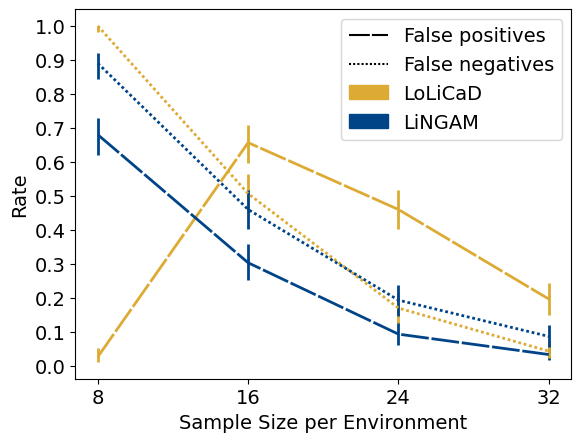

In [51]:
### Creating Figure 5
with open('ComparisonLingSample.pkl','rb') as f:
    ComparisonLingSample=pickle.load(f)
    
    
fpt=ComparisonLingSample['fpt']
fnt=ComparisonLingSample['fnt']
fptrunc=ComparisonLingSample['fptrunc']
fntrunc=ComparisonLingSample['fntrunc']
fplingt=ComparisonLingSample['fplingt']
fnlingt=ComparisonLingSample['fnlingt']
fnlingtrunc=ComparisonLingSample['fnlingtrunc']
fplingtrunc=ComparisonLingSample['fplingtrunc']
sample=ComparisonLingSample['sample']


fig, ax = plt.subplots()
plt.xticks(sample)
plt.yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)

falsepos = plt.Line2D([], [], color='black', linestyle=(0, (10, 1)),label='False positive')
falseneg = plt.Line2D([], [], color='black', linestyle=(0, (1, 1)),label='False negative')
lolicad = Patch([], [], color='#DDAA33',label='LoLiCaD')
ling = Patch([], [], color='#004488',label='LiNGAM')
conf= plt.Line2D([], [], color='black',label='Confidence level')

plt.errorbar(sample,fptrunc,yerr=yerr(runs,fptrunc),c='#DDAA33',linestyle=(0, (10, 1)),linewidth=2)
plt.errorbar(sample,fplingtrunc,yerr=yerr(runs,fplingtrunc),c='#004488',linestyle=(0, (10, 1)),linewidth=2)
plt.errorbar(sample,fntrunc,yerr=yerr(runs,fntrunc),c='#DDAA33',linestyle=(0, (1, 1)),linewidth=2)
plt.errorbar(sample,fnlingtrunc,yerr=yerr(runs,fnlingtrunc),c='#004488',linestyle=(0, (1, 1)),linewidth=2)
false_pos = plt.Line2D([], [], color='black', linestyle=(0, (10, 1)))
false_neg = plt.Line2D([], [], color='black', linestyle=(0, (1, 1)))
ax.legend(handles=[falsepos,falseneg,lolicad,ling],fontsize=14)
plt.xlabel('Sample Size per Environment',fontsize=14)
plt.ylabel('Rate',fontsize=14)
plt.savefig('ComparisonSampleChangeUniform.pdf',bbox_inches="tight",format='pdf')
plt.show()



fig, ax = plt.subplots()
plt.xticks(sample)
plt.yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)

falsepos = plt.Line2D([], [], color='black', linestyle=(0, (10, 1)),label='False positive')
falseneg = plt.Line2D([], [], color='black', linestyle=(0, (1, 1)),label='False negative')
lolicad = Patch([], [], color='#DDAA33',label='LoLiCaD')
ling = Patch([], [], color='#004488',label='LiNGAM')
conf= plt.Line2D([], [], color='black',label='Confidence level')


plt.errorbar(sample,fpt,yerr=yerr(runs,fpt),c='#DDAA33',linestyle=(0, (10, 1)),linewidth=2)
plt.errorbar(sample,fplingt,yerr=yerr(runs,fplingt),c='#004488',linestyle=(0, (10, 1)),linewidth=2)
plt.errorbar(sample,fnt,yerr=yerr(runs,fnt),c='#DDAA33',linestyle=(0, (1, 1)),linewidth=2)
plt.errorbar(sample,fnlingt,yerr=yerr(runs,fnlingt),c='#004488',linestyle=(0, (1, 1)),linewidth=2)
false_pos = plt.Line2D([], [], color='black', linestyle=(0, (10, 1)))
false_neg = plt.Line2D([], [], color='black', linestyle=(0, (1, 1)))
ax.legend(handles=[falsepos,falseneg,lolicad,ling],fontsize=14)
plt.xlabel('Sample Size per Environment',fontsize=14)
plt.ylabel('Rate',fontsize=14)
plt.savefig('ComparisonSampleChangeStudent.pdf',bbox_inches="tight",format='pdf')
plt.show()


C:\ProgramData\Anaconda3\envs\causal\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
C:\ProgramData\Anaconda3\envs\causal\lib\site-packages\ipykernel_launcher.py:24: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.


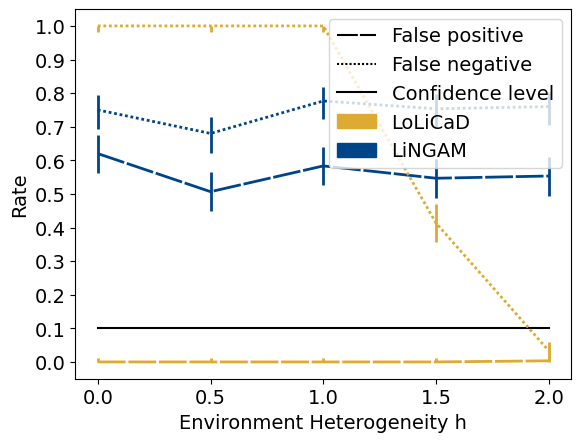

C:\ProgramData\Anaconda3\envs\causal\lib\site-packages\ipykernel_launcher.py:49: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
C:\ProgramData\Anaconda3\envs\causal\lib\site-packages\ipykernel_launcher.py:50: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.


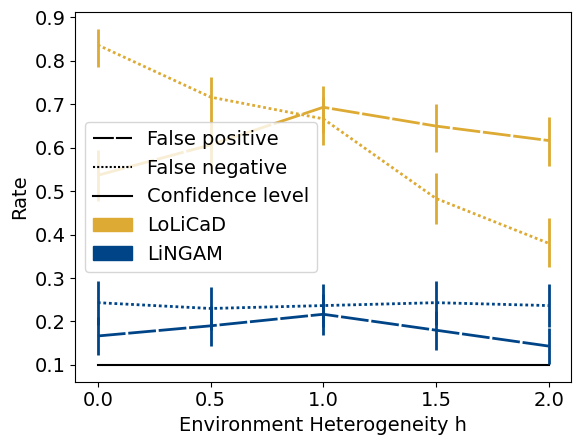

In [70]:
### Creating Figure 6 a
with open('ComparisonLingHetero2.pkl','rb') as f:
    ComparisonLingHetero=pickle.load(f)

fpt=ComparisonLingHetero['fpt']
fnt=ComparisonLingHetero['fnt']
fptrunc=ComparisonLingHetero['fptrunc']
fntrunc=ComparisonLingHetero['fntrunc']
fplingt=ComparisonLingHetero['fplingt']
fnlingt=ComparisonLingHetero['fnlingt']
fnlingtrunc=ComparisonLingHetero['fnlingtrunc']
fplingtrunc=ComparisonLingHetero['fplingtrunc']
hetero=ComparisonLingHetero['hetero']

fig, ax = plt.subplots()
plt.xticks(hetero)
plt.yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)

falsepos = plt.Line2D([], [], color='black', linestyle=(0, (10, 1)),label='False positive')
falseneg = plt.Line2D([], [], color='black', linestyle=(0, (1, 1)),label='False negative')
lolicad = Patch([], [], color='#DDAA33',label='LoLiCaD')
ling = Patch([], [], color='#004488',label='LiNGAM')
conf= plt.Line2D([], [], color='black',label='Confidence level')

plt.plot(hetero,0.1*np.ones((len(hetero))),label='Confidence level',color='black')
plt.errorbar(hetero,fptrunc,yerr=yerr(runs,fptrunc),c='#DDAA33',linestyle=(0, (10, 1)),linewidth=2)
plt.errorbar(hetero,fplingtrunc,yerr=yerr(runs,fplingtrunc),c='#004488',linestyle=(0, (10, 1)),linewidth=2)
plt.errorbar(hetero,fntrunc,yerr=yerr(runs,fntrunc),c='#DDAA33',linestyle=(0, (1, 1)),linewidth=2)
plt.errorbar(hetero,fnlingtrunc,yerr=yerr(runs,fnlingtrunc),c='#004488',linestyle=(0, (1, 1)),linewidth=2)
false_pos = plt.Line2D([], [], color='black', linestyle=(0, (10, 1)))
false_neg = plt.Line2D([], [], color='black', linestyle=(0, (1, 1)))
ax.legend(handles=[falsepos,falseneg,conf,lolicad,ling],fontsize=14)
plt.xlabel('Environment Heterogeneity h',fontsize=14)
plt.ylabel('Rate',fontsize=14)
plt.savefig('ComparisonLingHeteroUniform.pdf',bbox_inches="tight",format='pdf')
plt.show()


fig, ax = plt.subplots()
plt.xticks(hetero)
plt.yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)

falsepos = plt.Line2D([], [], color='black', linestyle=(0, (10, 1)),label='False positive')
falseneg = plt.Line2D([], [], color='black', linestyle=(0, (1, 1)),label='False negative')
lolicad = Patch([], [], color='#DDAA33',label='LoLiCaD')
ling = Patch([], [], color='#004488',label='LiNGAM')
conf= plt.Line2D([], [], color='black',label='Confidence level')

plt.plot(hetero,0.1*np.ones((len(hetero))),label='Confidence level',color='black')
plt.errorbar(hetero,fpt,yerr=yerr(runs,fpt),c='#DDAA33',linestyle=(0, (10, 1)),linewidth=2)
plt.errorbar(hetero,fplingt,yerr=yerr(runs,fplingt),c='#004488',linestyle=(0, (10, 1)),linewidth=2)
plt.errorbar(hetero,fnt,yerr=yerr(runs,fnt),c='#DDAA33',linestyle=(0, (1, 1)),linewidth=2)
plt.errorbar(hetero,fnlingt,yerr=yerr(runs,fnlingt),c='#004488',linestyle=(0, (1, 1)),linewidth=2)
false_pos = plt.Line2D([], [], color='black', linestyle=(0, (10, 1)))
false_neg = plt.Line2D([], [], color='black', linestyle=(0, (1, 1)))
ax.legend(handles=[falsepos,falseneg,conf,lolicad,ling],fontsize=14)
plt.xlabel('Environment Heterogeneity h',fontsize=14)
plt.ylabel('Rate',fontsize=14)
plt.savefig('ComparisonLingHeteroStudent.pdf',bbox_inches="tight",format='pdf')
plt.show()

In [9]:
### Creating Figure 6 
runs=300
with open('ComparisonLingEnvironmentsN=16.pkl','rb') as f:
    ComparisonLingEnvironments=pickle.load(f)
    

fpt=ComparisonLingEnvironments['fpt']
fnt=ComparisonLingEnvironments['fnt']
fplingt=ComparisonLingEnvironments['fplingt']
fnlingt=ComparisonLingEnvironments['fnlingt']
environments=ComparisonLingEnvironments['environments']

fig, ax = plt.subplots()
plt.xticks(environments)
plt.yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)

falsepos = plt.Line2D([], [], color='black', linestyle=(0, (10, 1)),label='False positive')
falseneg = plt.Line2D([], [], color='black', linestyle=(0, (1, 1)),label='False negative')
lolicad = Patch([], [], color='#DDAA33',label='LoLiCaD')
ling = Patch([], [], color='#004488',label='LiNGAM')
conf= plt.Line2D([], [], color='black',label='Confidence level')


plt.errorbar(environments,fpt,yerr=yerr(runs,fpt),c='#DDAA33',linestyle=(0, (10, 1)),linewidth=2)
plt.errorbar(environments,fplingt,yerr=yerr(runs,fplingt),c='#004488',linestyle=(0, (10, 1)),linewidth=2)
plt.errorbar(environments,fnt,yerr=yerr(runs,fnt),c='#DDAA33',linestyle=(0, (1, 1)),linewidth=2)
plt.errorbar(environments,fnlingt,yerr=yerr(runs,fnlingt),c='#004488',linestyle=(0, (1, 1)),linewidth=2)
false_pos = plt.Line2D([], [], color='black', linestyle=(0, (10, 1)))
false_neg = plt.Line2D([], [], color='black', linestyle=(0, (1, 1)))
ax.legend(handles=[falsepos,falseneg,lolicad,ling],fontsize=14)
plt.xlabel('Number of Environments',fontsize=14)
plt.ylabel('Rate',fontsize=14)
plt.savefig('ComparisonEnvironmentChangeStudentN=16.pdf',bbox_inches="tight",format='pdf')
plt.show()


with open('ComparisonLingEnvironmentsN=24_New.pkl','rb') as f:
    ComparisonLingEnvironments=pickle.load(f)
    

fpt=ComparisonLingEnvironments['fpt']
fnt=ComparisonLingEnvironments['fnt']
fplingt=ComparisonLingEnvironments['fplingt']
fnlingt=ComparisonLingEnvironments['fnlingt']
environments=ComparisonLingEnvironments['environments']

fig, ax = plt.subplots()
plt.xticks(environments)
plt.yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)

falsepos = plt.Line2D([], [], color='black', linestyle=(0, (10, 1)),label='False positive')
falseneg = plt.Line2D([], [], color='black', linestyle=(0, (1, 1)),label='False negative')
lolicad = Patch([], [], color='#DDAA33',label='LoLiCaD')
ling = Patch([], [], color='#004488',label='LiNGAM')
conf= plt.Line2D([], [], color='black',label='Confidence level')


plt.errorbar(environments,fpt,yerr=yerr(runs,fpt),c='#DDAA33',linestyle=(0, (10, 1)),linewidth=2)
plt.errorbar(environments,fplingt,yerr=yerr(runs,fplingt),c='#004488',linestyle=(0, (10, 1)),linewidth=2)
plt.errorbar(environments,fnt,yerr=yerr(runs,fnt),c='#DDAA33',linestyle=(0, (1, 1)),linewidth=2)
plt.errorbar(environments,fnlingt,yerr=yerr(runs,fnlingt),c='#004488',linestyle=(0, (1, 1)),linewidth=2)
false_pos = plt.Line2D([], [], color='black', linestyle=(0, (10, 1)))
false_neg = plt.Line2D([], [], color='black', linestyle=(0, (1, 1)))
ax.legend(handles=[falsepos,falseneg,lolicad,ling],fontsize=14)
plt.xlabel('Number of Environments',fontsize=14)
plt.ylabel('Rate',fontsize=14)
# plt.savefig('ComparisonEnvironmentChangeStudentN=24.pdf',bbox_inches="tight",format='pdf')
plt.show()

EOFError: Ran out of input